# Costly Conversion

# Problem
Company XYZ sells a software for \\$39 . Since revenue has been flat for some time, the VP of
Product has decided to run a test increasing the price. She hopes that this would increase
revenue. In the experiment, 66% of the users have seen the old price (\\$39), while a random
sample of 33% users a higher price (\\$59). The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users.

Especially need to answer the following questions:

1). Should the company sell its software for \\$39 or \\$59?

2). The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

3).  The VP of Product feels that the test has been running for too long and she should
have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain
why.

## Approach
1). Compare revenue obtained by two groups to decide which price should be chosen.

2). Obtain the insights from EDA.

3). Compute the sample size in advance.

## Results
1). Results showed that the higher price $59 will provide a higher revenue. The revernue from customers seeing \\$59 is 18% more than the revenue from customers seeing \\$39. So changing price from \\$39 to \\$59 will increase the total revenue.

2). Customers from friend_referal brought the highest revenue. Customers using ios or mac brought more revenues than those using other operating systems.

3). The test could stop earlier at 2015-04-06. Running longer just narrowed the confidence interval of the results.


# 1. Load Data

In [1]:
import pandas as pd
import io,csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from city_to_state import city_to_state_dict
#from uszipcode import Zipcode
from pandas import datetime

In [2]:
#pip install uszipcode==0.2.4

In [3]:
# Load the test results in the dataframe 'test'
test = pd.read_csv('./Pricing_Test_data/test_results.csv', header=0 )
test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [5]:
# Load the user data in the dataframe 'users'
users = pd.read_csv('./Pricing_Test_data/user_table.csv', header=0 )
users.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [7]:
# Join events and users
test_users = pd.merge(test, users, on='user_id', how='left')
test_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 0 to 316799
Data columns (total 12 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
city                275616 non-null object
country             275616 non-null object
lat                 275616 non-null float64
long                275616 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 31.4+ MB


In [8]:
test_users.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [9]:
test_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 0 to 316799
Data columns (total 12 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
city                275616 non-null object
country             275616 non-null object
lat                 275616 non-null float64
long                275616 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 31.4+ MB


In [10]:
test_users.price.value_counts()

39    202672
59    114128
Name: price, dtype: int64

In [11]:
test_users.price.value_counts(normalize=True)

39    0.639747
59    0.360253
Name: price, dtype: float64

In [12]:
test_users.groupby(by='price').converted.value_counts(normalize=True)

price  converted
39     0            0.980111
       1            0.019889
59     0            0.984430
       1            0.015570
Name: converted, dtype: float64

In [13]:
test_users.groupby(by='price').converted.value_counts(normalize=False)

price  converted
39     0            198641
       1              4031
59     0            112351
       1              1777
Name: converted, dtype: int64

In [52]:
test_users.groupby(by=['operative_system','price']).converted.value_counts(normalize=False)

operative_system  price  converted
android           39     0            47422
                         1              787
                  59     0            26394
                         1              332
iOS               39     0            60384
                         1             1459
                  59     0            32950
                         1              672
linux             39     0             2172
                         1               34
                  59     0             1929
mac               39     0            15938
                         1              416
                  59     0             8545
                         1              186
other             39     0            10344
                         1              147
                  59     0             5650
                         1               63
windows           39     0            62381
                         1             1188
                  59     0            368

In [15]:
test_users.city.value_counts()

New York       25748
Chicago         7153
Houston         6706
San Antonio     4633
Los Angeles     4141
               ...  
Cerritos           1
Ocala              1
Costa Mesa         1
East Lake          1
New Milford        1
Name: city, Length: 923, dtype: int64

In [16]:
test_users.country.value_counts()

USA    275616
Name: country, dtype: int64

In [22]:
# Add revenue to the dataframe
test_users['revenue'] = test_users['converted']*test_users['price']
test_users['revenue'].value_counts()

0     310992
39      4031
59      1777
Name: revenue, dtype: int64

# 2. Higher Price or Lower Price? 

In [25]:
def r_bar_plot(x,y,data,hue,x_rotation,text_rotation,text_xoffset,text_yoffset):
    plt.figure(figsize=[15,4])
    ax = sns.barplot(x = x, y = y,  data=data, hue=hue)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.+0.15,
            height,
            '{:1.2f}'.format(height),
            ha="center", fontsize=16, rotation=text_rotation) 
    plt.xticks(rotation = x_rotation, ha='left', fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(y, fontsize=16)
    if hue: plt.legend(fontsize=16)
    plt.show()
    
def c_bar_plot(x,y,data,hue,x_rotation,text_rotation,text_xoffset,text_yoffset):
    plt.figure(figsize=[15,4])
    ax = sns.barplot(x = x, y = y,  data=data, hue=hue)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.+text_xoffset,
            height+text_yoffset,
            '{:1.3f}'.format(height),
            ha="center", fontsize=16, rotation=text_rotation) 
    plt.xticks(rotation = x_rotation, ha='left', fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(y, fontsize=16)
    if hue: plt.legend(fontsize=16)
    plt.show()
    
def bar_plot(x,y,data,hue,x_rotation,text_rotation,text_xoffset,text_yoffset,num_dis):
    plt.figure(figsize=[15,4])
    ax = sns.barplot(x = x, y = y,  data=data, hue=hue)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.+text_xoffset,
            height+text_yoffset,
            num_dis.format(height),
            ha="center", fontsize=16, rotation=text_rotation) 
    plt.xticks(rotation = x_rotation, ha='left', fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(y, fontsize=16)
    if hue: plt.legend(fontsize=16)
    plt.show()  

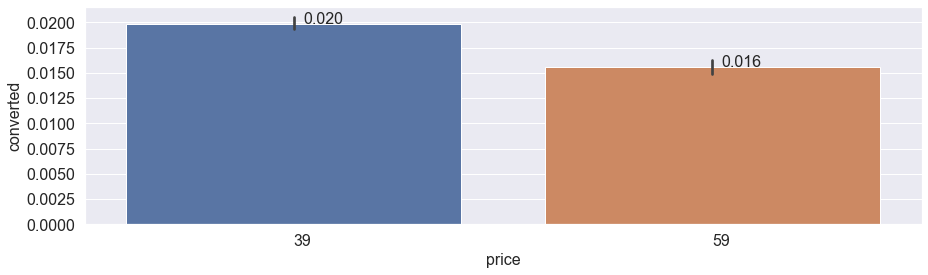

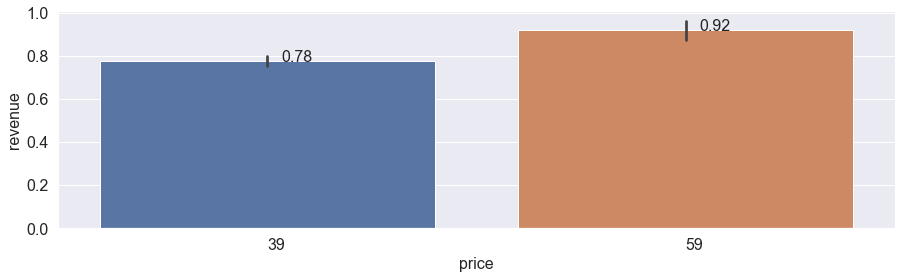

In [42]:
# Price vs 'converted'
bar_plot(x = 'price', y = 'converted',  data=test_users, hue=None, x_rotation=0.005,text_rotation=0,text_xoffset=0.07,text_yoffset=0,num_dis='{:1.3f}')
# Price vs 'revenue'
bar_plot(x = 'price', y = 'revenue',  data=test_users, hue=None, x_rotation=0,text_rotation=0,text_xoffset=0.07,text_yoffset=0,num_dis='{:1.2f}')

In [21]:
(0.020-0.016)/0.020

0.2

In [32]:
(0.92-0.78)/0.78

0.1794871794871795

We can see that customers seeing \\$59 have 20% lower conversion rate than customers seeing \\$39. However, the revernue from customers seeing \\$59 is 18% more than the revenue from customers seeing \\$39. So changing price from \\$39 to \\$59 will increase the total revenue.

# 3. Actionable Insights for Increasing Conversion Rate

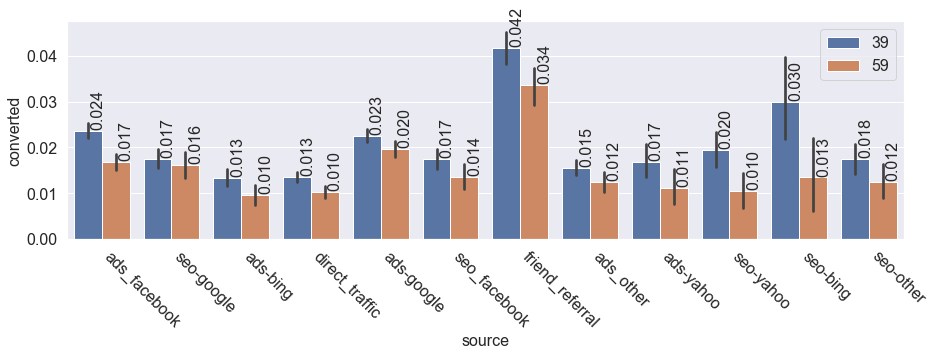

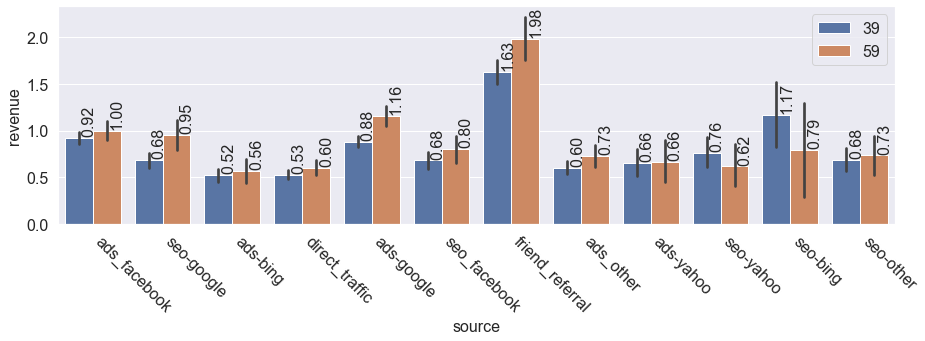

In [41]:
# 'source' vs 'converted'
bar_plot(x = 'source', y = 'converted',  data=test_users, hue="price", x_rotation=-45, text_rotation=90, text_xoffset=0.15, text_yoffset=0.001, num_dis='{:1.3f}')
# 'source' vs 'revenue'
bar_plot(x = 'source', y = 'revenue',  data=test_users, hue="price", x_rotation=-45, text_rotation=90, text_xoffset=0.15, text_yoffset=0.05, num_dis='{:1.2f}')

We can see customers from friend_referral had the highest converted rate and also brought highest revenue for both the higher and lower prices. So this should be the most valuabe source of the revenue. Maybe some incentive methods can be taken such as referral bonus to further improve revenue from this part.

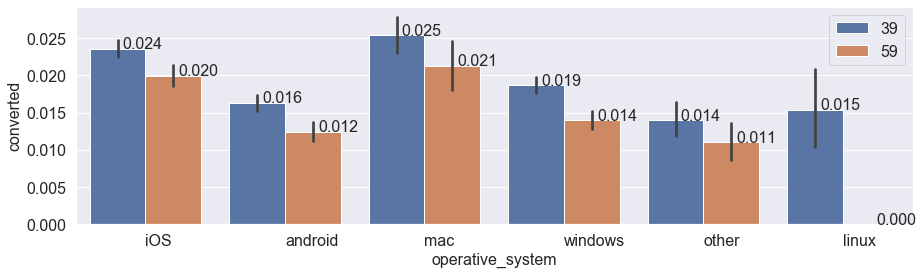

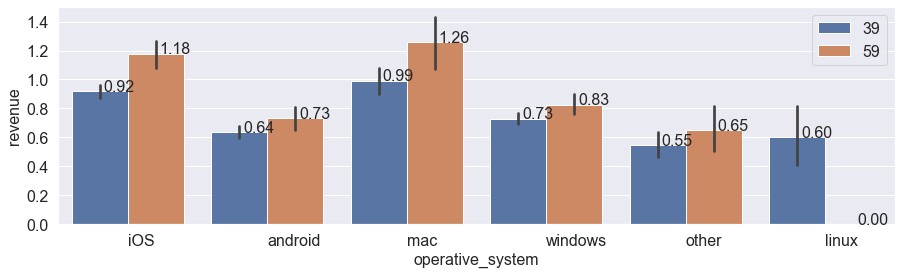

In [50]:
# 'operative_system' vs 'converted'
bar_plot(x = 'operative_system', y = 'converted',  data=test_users, hue="price", x_rotation=0, text_rotation=0, text_xoffset=0.18, text_yoffset=0, num_dis='{:1.3f}')
# 'operative_system' vs 'revenue'
bar_plot(x = 'operative_system', y = 'revenue',  data=test_users, hue="price", x_rotation=0, text_rotation=0, text_xoffset=0.14, text_yoffset=0, num_dis='{:1.2f}')

We can see that customers who use mac and iOS had the highest converted rate and also brought highest revenue for both the higher and lower prices. So maybe more advertisements can be put for mac and iOS users to further increase the revenue from this part. Another thing need to notice is that none of the linux users who saw \\$59 bought the software. Although the number of customers who use linux is much smaller than those using other operative systems, they still brought comparable revenue to other users for the lower price. So some actions need to be taken to increase the conversion rate for linux users for the higher price.

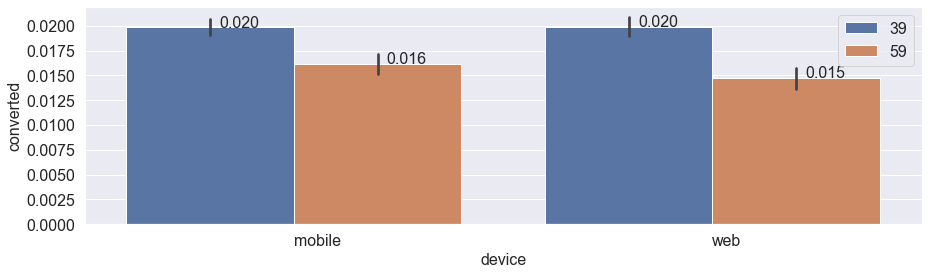

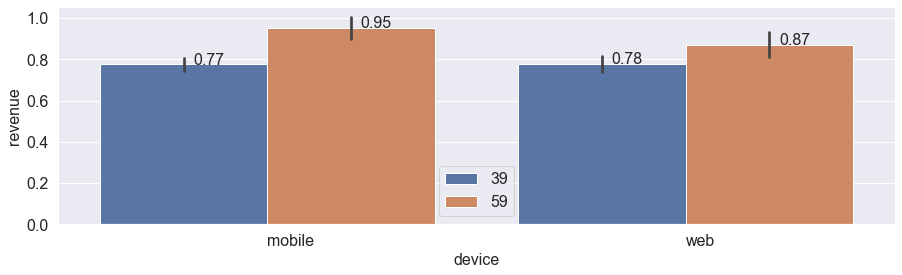

In [46]:
# 'device' vs 'converted'
bar_plot(x = 'device', y = 'converted',  data=test_users, hue="price", x_rotation=0, text_rotation=0, text_xoffset=0.07, text_yoffset=0, num_dis='{:1.3f}')
# 'device' vs 'revenue'
bar_plot(x = 'device', y = 'revenue',  data=test_users, hue="price", x_rotation=0, text_rotation=0, text_xoffset=0.06, text_yoffset=0, num_dis='{:1.2f}')

We can see that for the conversion rate, there is no big diffenece between mobile and web users for both prices.

In [149]:
test_users.groupby(by='city').price.value_counts(normalize=True)

city       price
Abilene    39       0.651972
           59       0.348028
Akron      39       0.623955
           59       0.376045
Alameda    39       0.600000
                      ...   
Yuba City  59       0.160000
Yucaipa    39       0.747126
           59       0.252874
Yuma       39       0.640187
           59       0.359813
Name: price, Length: 1832, dtype: float64

In [150]:
test_users.groupby(by=['city','price']).converted.value_counts(normalize=True)

city     price  converted
Abilene  39     0            0.975089
                1            0.024911
         59     0            0.993333
                1            0.006667
Akron    39     0            0.973214
                               ...   
Yucaipa  59     1            0.022727
Yuma     39     0            0.992701
                1            0.007299
         59     0            0.974026
                1            0.025974
Name: converted, Length: 3095, dtype: float64

In [151]:
test_users.city.value_counts()

New York       25748
Chicago         7153
Houston         6706
San Antonio     4633
Los Angeles     4141
               ...  
Costa Mesa         1
New Milford        1
Cerritos           1
East Lake          1
Ocala              1
Name: city, Length: 923, dtype: int64

In [152]:
#from uszipcode import SearchEngine
#search = SearchEngine(simple_zipcode=True)
#def city_to_state(city):
#    if isinstance(city, str):
#        temp = search.by_city(city)
#        if len(temp)>0:
#            return temp[0].state_abbr
#        else:
#            return ''
#    else:
#        return ''

In [154]:
# Create column 'state'
def city_to_state_(city):
    if city == 'New York': city = 'New York City'
    if city == "Bloomfield Township": city = "West Bloomfield Township"
    if isinstance(city, str) and (city in city_to_state_dict.keys()):
        return city_to_state_dict[city]
    else:
        return ''

test_users['state'] = list(map(city_to_state_, test_users['city']))

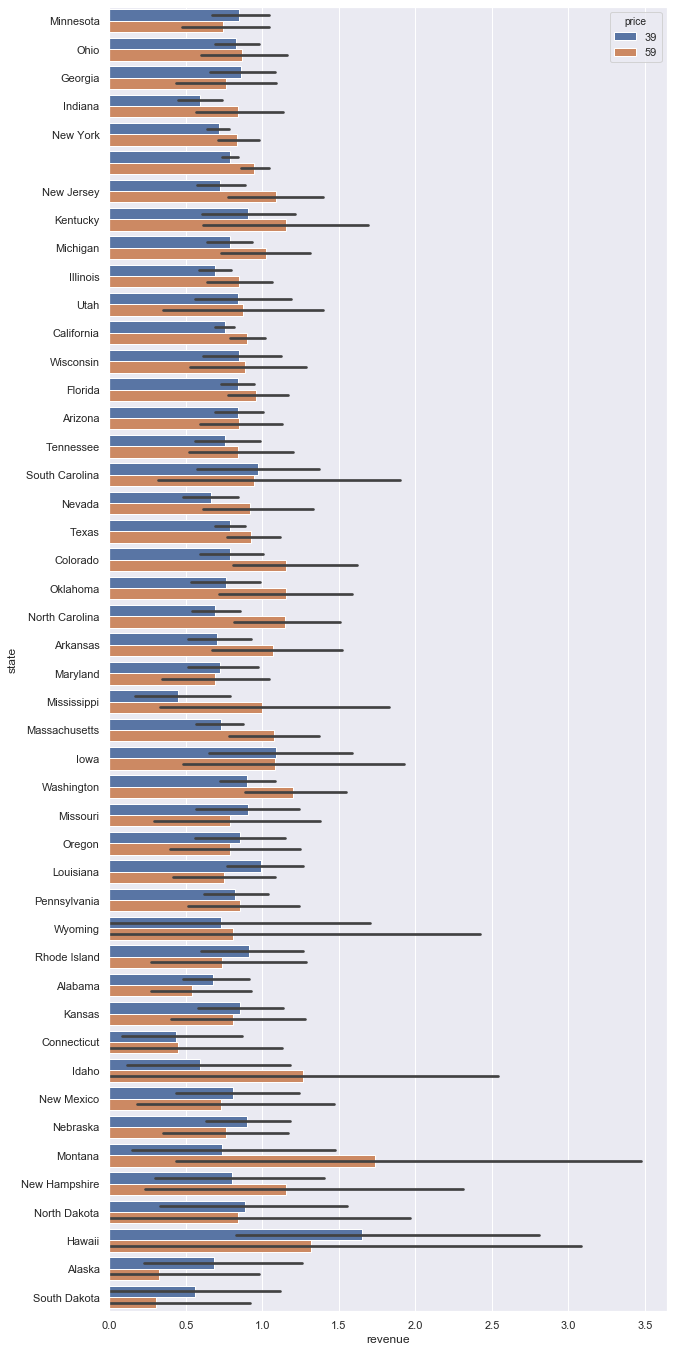

In [155]:
# revenue vs state
fig, saxis = plt.subplots(1, figsize=(10,24))
sns.barplot(x = 'revenue', y = 'state',  data=test_users, hue="price", orient='h')

We can see that the number of customers from some states are too small to get a statistical significant conclusion. Customers from other states didn't show a big diffenece. 

In [161]:
# Create column 'date'
test_users['timestamp']=list(map(lambda x:x.replace(':60', ':59'), test_users['timestamp']))
test_users['timestamp'] = pd.to_datetime(test_users['timestamp']) 
test_users['date']=test_users['timestamp'].dt.floor('D')

In [165]:
test_users.groupby(by=['date','price']).converted.value_counts(normalize=True)

date        price  converted
2015-03-02  39     0            0.982196
                   1            0.017804
            59     0            0.984429
                   1            0.015571
2015-03-03  39     0            0.977124
                                  ...   
2015-05-30  59     1            0.016811
2015-05-31  39     0            0.975737
                   1            0.024263
            59     0            0.981009
                   1            0.018991
Name: converted, Length: 364, dtype: float64

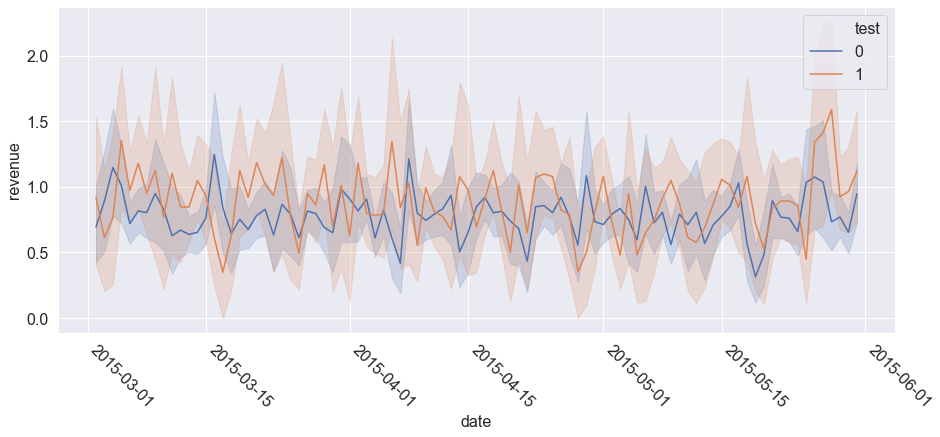

In [230]:
# revenue vs date
plt.figure(figsize=[15,6])
ax = sns.lineplot(x="date", y="revenue", hue="test",
                  data=test_users)
plt.xticks(rotation =-45, ha='left', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('revenue', fontsize=16)
plt.legend(fontsize=16)
plt.show()

We can see that the revenue didn't change much from moth to month.

# 3. Whether the Test can be Stopped Sooner? 

Next, I will investigate whether the test can be run for a shorter time.

In [53]:
39*0.02/59

0.013220338983050847

In [56]:
(1.55-1.32)/1.32

0.17424242424242423

In [57]:
39654*3

118962

Since the sample size for \\$39 is large, we just use its conversion rate 2% as the base 
conversion rate, or this number can be obtained from the data before the test started. Then to get the same revenue, the equivalent conversion rate for \\$59 is 1.32%. Assume statistical power 1−β is 80%, significance level α is 5%, to get similar minimum detectable effect:	17.42%, we need sample size 39,654 per variation. Since ratio of the sample size for \\$39 to \\$59 is 2:1, we need total 118962 samples.

In [58]:
test_users_less=test_users.sort_values(by='timestamp')[:118962]

In [59]:
test_users_less

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
215757,813537,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,NaN,NaN,NaN,NaN,0
166052,503836,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,Plymouth,USA,45.02,-93.46,0
20240,583796,2015-03-02 00:12:40,ads_facebook,web,windows,0,39,0,Jacksonville,USA,30.33,-81.66,0
278620,632922,2015-03-02 00:16:25,ads-google,web,windows,0,39,0,Virginia Beach,USA,36.74,-76.04,0
206916,813542,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,North Port,USA,27.05,-82.19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52099,715199,2015-04-05 09:57:38,ads-google,mobile,iOS,0,39,0,Los Angeles,USA,34.11,-118.41,0
300194,133051,2015-04-05 09:57:38,ads-google,mobile,iOS,0,39,0,NaN,NaN,NaN,NaN,0
21570,232513,2015-04-05 09:57:44,seo-google,mobile,iOS,0,39,0,Cupertino,USA,37.31,-122.05,0
13904,410952,2015-04-05 09:57:44,seo-google,mobile,iOS,0,39,0,Cupertino,USA,37.31,-122.05,0


In [60]:
test_users_less.price.value_counts()

39    76159
59    42803
Name: price, dtype: int64

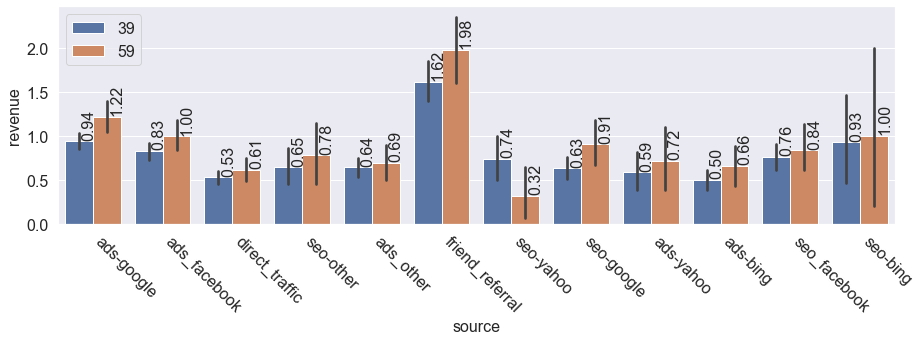

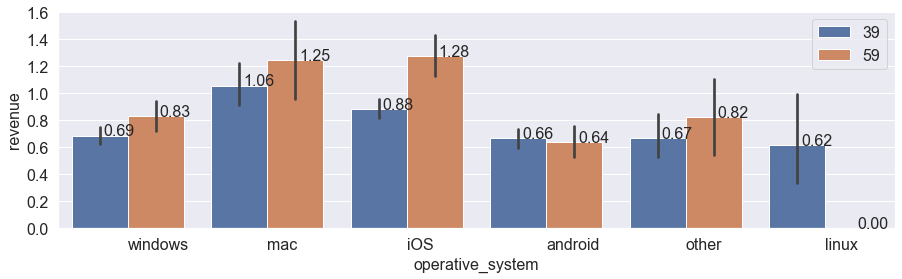

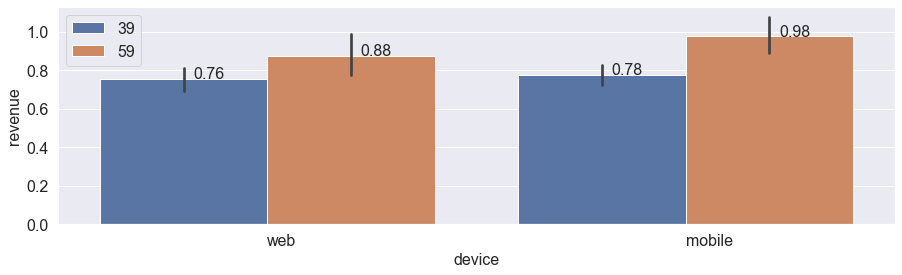

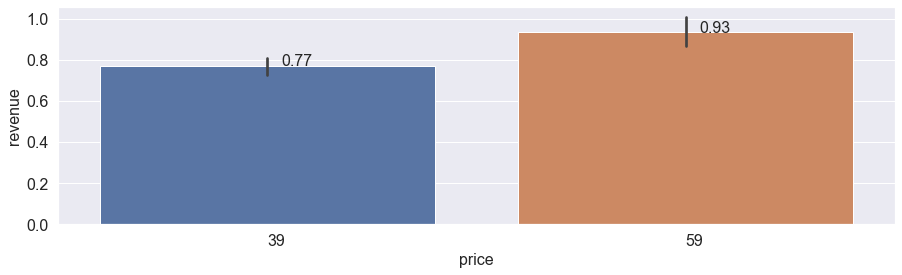

In [61]:
# 'source' vs 'revenue'
bar_plot(x = 'source', y = 'revenue',  data=test_users_less, hue="price", x_rotation=-45, text_rotation=90, text_xoffset=0.15, text_yoffset=0.05, num_dis='{:1.2f}')
# 'operative_system' vs 'revenue'
bar_plot(x = 'operative_system', y = 'revenue',  data=test_users_less, hue="price", x_rotation=0, text_rotation=0, text_xoffset=0.14, text_yoffset=0, num_dis='{:1.2f}')
# 'device' vs 'revenue'
bar_plot(x = 'device', y = 'revenue',  data=test_users_less, hue="price", x_rotation=0, text_rotation=0, text_xoffset=0.06, text_yoffset=0, num_dis='{:1.2f}')
# Price vs 'revenue'
bar_plot(x = 'price', y = 'revenue',  data=test_users_less, hue=None, x_rotation=0,text_rotation=0,text_xoffset=0.07,text_yoffset=0,num_dis='{:1.2f}')

We can see with just 118962 total samples, we can get the same conclusion. That means the test could stop earlier at 2015-04-06. Running longer just reduced the confidence interval of the results.